In [1]:
%matplotlib widget
from bmcs_cross_section.api import MKappa, EC2
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# EC2, eq. (3.14)

sig_c1, sig_c2, sig_c3, eps_cu1, b, c, d, A_f, f_fu, E_f = \
 sp.symbols('sigma_c1 sigma_c2 sigma_c3, varepsilon_cu1, b, c, d, A_f, f_{fu}, E_f', real=True, nonnegative=True)
eps_cy, eps_cu, eps, E_cc, f_cm = \
sp.symbols('varepsilon_cy, varepsilon_cu, varepsilon, E_cc, f_cm', real=True, nonnegative=True)

k = 1.05 * E_cc * eps_cy / f_cm
eta = eps / eps_cy
sig_c = f_cm * (k*eta - eta**2)/(1+eta*(k-2))

sig_c_eps_ = sp.Piecewise(
        (0, eps > eps_cu),
        (sig_c, eps > 0),
        (0, True)
)

In [3]:
# # Comparison to EC2, multi-linear concept

# result2 = np.zeros((len(f_cms), 3))

# for i, f_cm_ in enumerate(f_cms):
#     sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
#                                 f_cm:EC2.get_f_cm(f_cm_ - 8), eps_cu:EC2.get_eps_cu1(f_cm_- 8)})
#     get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
#     eps_exact = np.linspace(0, eps_cy_, 300)
#     sig_exact = get_sig(eps_exact)
#     area_fine = np.trapz(y=sig_exact, x=eps_exact)
    
#     f_ck = f_cm_ - 8
#     eps_c3 = EC2.get_eps_c3(f_ck)
#     eps_cu3 = EC2.get_eps_cu3(f_ck)
#     area = eps_c3 * f_cm_ / 2 + (eps_cu3 - eps_c3) * f_cm_
    
#     result2[i, 0] = f_cm_
#     result2[i, 1] = area_fine
#     result2[i, 2] = area
# result2

In [4]:
f_cms = np.array([ 20.,  24.,  28.,  33.,  38.,  43.,  48.,  53.,  58.,  63.,  68., 78.,  88.,  98., 108.])
result = np.zeros((len(f_cms), 2))

for i, f_cm_ in enumerate(f_cms):
    eps_cy_ = EC2.get_eps_c1(f_cm_ - 8)
    eps_cu_ = EC2.get_eps_cu1(f_cm_- 8)

    sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
                                f_cm:EC2.get_f_cm(f_cm_ - 8), eps_cu:eps_cu_})
    get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
    eps_exact = np.linspace(0, eps_cy_, 300)
    sig_exact = get_sig(eps_exact)
    area_fine = np.trapz(y=sig_exact, x=eps_exact)

    sig_eps_c1_new = 2 * area_fine / eps_cy_
    sig_eps_c1_scale = sig_eps_c1_new / f_cm_
    
    area_part_2 = (eps_cu_ - eps_cy_)
    
    result[i, 0] = f_cm_
    result[i, 1] = sig_eps_c1_scale

result

array([[ 20.        ,   1.40553767],
       [ 24.        ,   1.38424032],
       [ 28.        ,   1.36561157],
       [ 33.        ,   1.34507086],
       [ 38.        ,   1.32681699],
       [ 43.        ,   1.31030984],
       [ 48.        ,   1.29518105],
       [ 53.        ,   1.28116745],
       [ 58.        ,   1.2680741 ],
       [ 63.        ,   1.25575229],
       [ 68.        ,   1.2440857 ],
       [ 78.        ,   1.22236429],
       [ 88.        ,   1.20161951],
       [ 98.        ,   1.16735515],
       [108.        ,   1.13352108]])

In [5]:
f_cms = np.array([ 20.,  24.,  28.,  33.,  38.,  43.,  48.,  53.,  58.,  63.,  68., 78.,  88.,  98., 108.])
result = np.zeros((len(f_cms), 2))

for i, f_cm_ in enumerate(f_cms):
    eps_cy_ = EC2.get_eps_c1(f_cm_ - 8)
    eps_cu_ = EC2.get_eps_cu1(f_cm_- 8)

    sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
                                f_cm:EC2.get_f_cm(f_cm_ - 8), eps_cu:eps_cu_})
    get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
    eps_exact = np.linspace(0, eps_cy_, 300)
    sig_exact = get_sig(eps_exact)
    area_fine = np.trapz(y=sig_exact, x=eps_exact)

    sig_eps_c1_new = 2 * area_fine / eps_cy_
    sig_eps_c1_scale = sig_eps_c1_new / f_cm_
    
    area_part_2 = (eps_cu_ - eps_cy_)
    
    result[i, 0] = f_cm_
    result[i, 1] = sig_eps_c1_scale

result

array([[ 20.        ,   1.40553767],
       [ 24.        ,   1.38424032],
       [ 28.        ,   1.36561157],
       [ 33.        ,   1.34507086],
       [ 38.        ,   1.32681699],
       [ 43.        ,   1.31030984],
       [ 48.        ,   1.29518105],
       [ 53.        ,   1.28116745],
       [ 58.        ,   1.2680741 ],
       [ 63.        ,   1.25575229],
       [ 68.        ,   1.2440857 ],
       [ 78.        ,   1.22236429],
       [ 88.        ,   1.20161951],
       [ 98.        ,   1.16735515],
       [108.        ,   1.13352108]])

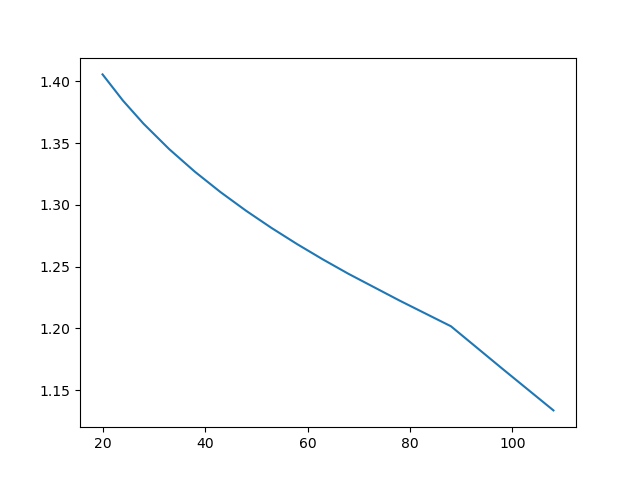

In [6]:
fig1, ax1 = plt.subplots()
ax1.plot(result[:, 0], result[:, 1])

In [7]:
# Linear regression using numpy

m1, p1 = np.polyfit(result[:, 0], result[:, 1], 1)
sig_cy_scale = m1 * f_cm + p1 # must be <= 1
sig_cy_scale

1.44328334402529 - 0.00288035647501513*f_cm

In [8]:
get_sig_cy_scale = sp.lambdify(f_cm, sig_cy_scale, 'numpy')

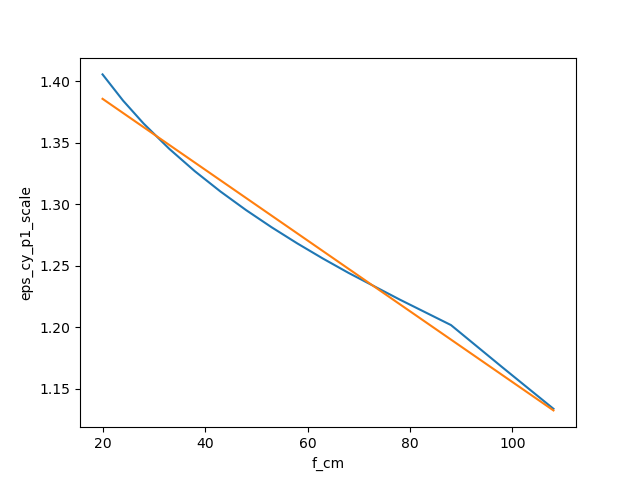

In [9]:
fig1, ax1 = plt.subplots()
f_cm_mid = (result[:, 0][-1] + result[:, 0][0])/2
ax1.set_xlabel('f_cm')
ax1.set_ylabel('eps_cy_p1_scale')

ax1.plot(result[:, 0], result[:, 1])
ax1.plot(result[:, 0], get_sig_cy_scale(result[:, 0]))

# sig_cy_scale_mid = np.interp(f_cm_mid, result[:, 0], get_sig_cy_scale(result[:, 0]))
# ax1.plot(f_cm_mid, sig_cy_scale_mid, 'o')

[ 0 48 48]
area1 = 0.0722477864306494
area2 = 0.0722477864306494


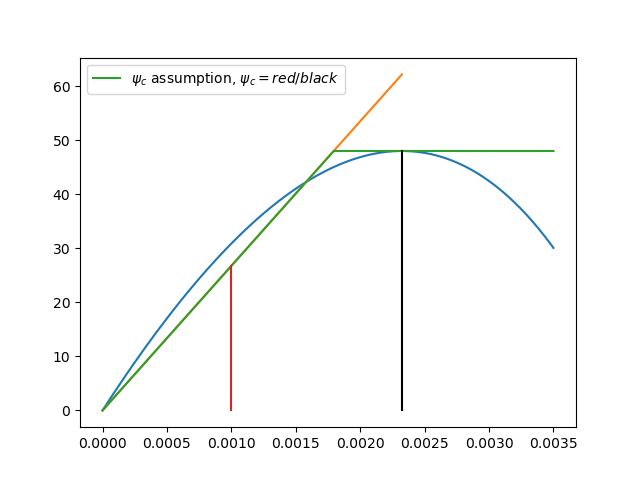

In [299]:
fig, ax = plt.subplots()

for f_cm_ in [48]: # f_cms:
    eps_cy_ = EC2.get_eps_c1(f_cm_ - 8)
    eps_cu_ = EC2.get_eps_cu1(f_cm_ - 8)

    eps_fine = np.linspace(0, eps_cu_, 300)

    sig_c_eps = sig_c_eps_.subs({E_cc:EC2.get_E_cm(f_cm_ - 8), eps_cy:eps_cy_, 
                                f_cm:f_cm_, eps_cu:eps_cu_})
    get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
    sig_fine = get_sig(eps_fine)
    
    sig_scale_for_f_cm = result[np.argwhere(result[:, 0] == f_cm_)[0]][0][1]
    eps_coarse = np.array([0., eps_cy_])
    sig_coarse = np.array([0., f_cm_ * sig_scale_for_f_cm])
    
    eps_sig_coarse_equals_f_cm = np.interp(f_cm_, sig_coarse, eps_coarse)
    eps_coarse_psi = np.array([0, eps_sig_coarse_equals_f_cm, eps_cu_])
    sig_coarse_psi = np.array([0, f_cm_, f_cm_])
    print(sig_coarse_psi)
    
    eps_example = 0.001
    sig_example = np.interp(eps_example, eps_coarse, sig_coarse)
    
    area = np.trapz(y=sig_coarse, x=eps_coarse)
    print('area1 =', area)
    print('area2 =', sig_coarse[-1] * eps_coarse[-1] / 2)
    
    ax.plot(eps_fine, sig_fine)
    ax.plot(eps_coarse, sig_coarse)
    ax.plot(eps_coarse_psi, sig_coarse_psi, label='$\psi_c$ assumption, $\psi_c = red/black$')
    ax.plot([eps_example, eps_example], [0, sig_example])
    ax.plot([eps_cy_, eps_cy_], [0, f_cm_], c='black')
    ax.legend()
    
# fig.show()

## Deriving $\psi_c, M_n$ equations for the linearized curve

In [307]:
substitute_eps_cy = False

if substitute_eps_cy:
    # WARNING, TODO: Instead use 0.001 * sp.Min(0.7 * f_cm ** 0.31, 2.8) ??
    eps_c1 = 0.001 * 0.7 * f_cm ** 0.31
#     eps_c1 = 0.001 * sp.Min(0.7 * f_cm ** 0.31, 2.8)
else:
    eps_c1 = eps_cy

f_cm_max = f_cm * sig_cy_scale
sig_line = sp.Line(sp.Point(0, 0), sp.Point(eps_c1, f_cm_max))

sig_eq_ = sig_line.equation(x=eps, y=sig_c1)
sig_eq = sp.solve(sig_eq_, sig_c1)[0]
sig_eq

f_cm*varepsilon*(144328334402529000 - 288035647501513*f_cm)/(100000000000000000*varepsilon_cy)

In [124]:
sig_eq_area_up_to_eps = sp.integrate(sp.simplify(sig_eq), eps)
sig_eq_area_up_to_eps

varepsilon**2*(-288035647501513*f_cm**2 + 144328334402529000*f_cm)/(200000000000000000*varepsilon_cy)

In [269]:
# Compare F_t = A_f * f_fu with F_c_cy, if F_t <= F_c_1, then use psi_c formula, otherwise psi_c = 1
# Note: one can also compare eps_top_solved with eps_c1, but the equation of eps_top_solved is more complicated
eps_fu = f_fu/E_f
c_1 = d * (eps_c1 / (eps_c1 + eps_fu))
F_c_cy = sig_eq_area_up_to_eps.subs({eps:eps_c1}) * (c_1 / eps_c1) * b
F_c_cy = sp.simplify(F_c_cy)
F_c_cy

E_f*b*d*f_cm*varepsilon_cy*(144328334402529000 - 288035647501513*f_cm)/(200000000000000000*(E_f*varepsilon_cy + f_{fu}))

In [126]:
2500 * 20

50000

In [127]:
sp.N(F_c_cy.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

370604.025760238

In [128]:
# Solving eps top for part 1
def get_eps_top_solved():
    c = d * eps/(eps + eps_fu)
    F_t = A_f * f_fu
    sig_z_area = sig_eq_area_up_to_eps * (c / eps)
    F_c = sig_z_area * b
    eps_top_solved = sp.solve(F_t - F_c, eps)[0] # TODO, this the positive solution, make sure you don't want the negative
    eps_top_solved = sp.simplify(eps_top_solved)
    return eps_top_solved

In [129]:
eps_part_1 = get_eps_top_solved()
eps_part_1

-200000000*f_{fu}*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)/(sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000))

In [130]:
def get_psi():
    eps_top_solved = get_eps_top_solved()
    sig_c_max = sig_eq.subs({eps: eps_top_solved})
    psi_c = sp.Min(sig_c_max / f_cm, 1)
    psi_c = sp.simplify(psi_c)
    return psi_c

In [131]:
psi_c = get_psi()
psi_c

Min(1, sqrt(5)*sqrt(A_f)*f_{fu}*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm)/(500000000*sqrt(E_f)*b*d*f_cm*sqrt(varepsilon_cy)) + A_f*f_{fu}/(b*d*f_cm))

In [156]:
sp.N(psi_c.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

0.451896632119519

In [132]:
psi_c_reduced = sp.cse(psi_c)
psi_c_reduced[-1][0]

Min(1, sqrt(5)*sqrt(A_f)*x0*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*f_cm**2*x1 + 144328334402529000*f_cm*x1)/(500000000*sqrt(E_f)*sqrt(varepsilon_cy)) + A_f*x0)

In [154]:
f_1 = sp.symbols('f_1')
f_1_ = f_fu / (b * d * f_cm)
# psi_c_reduced_final = f_1*sp.sqrt(5 * A_f * (50000000000000000*A_f*E_f*eps_cy - 288035647501513*f_cm**2*b*d + \
#                                              144328334402529000*f_cm*b*d))/(500000000*sp.sqrt(E_f)*sp.sqrt(eps_cy)) + A_f*f_1
psi_c_reduced_final = f_1*sp.sqrt(5 * A_f * (5*10**16*A_f*E_f*eps_cy - 2.88 * 10**14*f_cm**2*b*d + \
                                             1.443 * 10**17*f_cm*b*d))/(5 * 10 **8*sp.sqrt(E_f)*sp.sqrt(eps_cy)) + A_f*f_1


psi_c_reduced_final

0.759736796528903*sqrt(5)*sqrt(A_f)*f_1*sqrt(0.346500346500347*A_f*E_f*varepsilon_cy - 0.001995841995842*b*d*f_cm**2 + b*d*f_cm)/(sqrt(E_f)*sqrt(varepsilon_cy)) + A_f*f_1

In [157]:
sp.N(psi_c_reduced_final.subs({f_1:f_1_}).subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

0.451851918807199

In [160]:
0.759736796528903 * np.sqrt(5)

1.6988231220465535

In [168]:
psi_c_reduced_final_final = 1.699 * sp.sqrt(A_f)*f_1\
*sp.sqrt(0.3465*A_f*E_f*eps_cy - 0.002*b*d*f_cm**2 + b*d*f_cm)/(sp.sqrt(E_f)*sp.sqrt(eps_cy)) + A_f*f_1
psi_c_reduced_final_final

1.699*sqrt(A_f)*f_1*sqrt(0.3465*A_f*E_f*varepsilon_cy - 0.002*b*d*f_cm**2 + b*d*f_cm)/(sqrt(E_f)*sqrt(varepsilon_cy)) + A_f*f_1

In [173]:
sp.N(psi_c_reduced_final_final.subs({f_1:f_1_}).subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

0.451846987979982

### Validate with Test T1

In [315]:
3823.90 * 28.96

110740.144

In [314]:
sp.N(F_c_cy.subs({f_cm:98.63, b:300, d:90, f_fu:3823.90, E_f:247468.92, A_f:28.96, E_cc:EC2.get_E_cm(98.63-8), eps_cy:EC2.get_eps_c1(98.63-8), eps_cu:EC2.get_eps_cu1(98.63-8)}))

236780.226388124

In [310]:
sp.N(psi_c.subs({f_cm:98.63, b:300, d:90, f_fu:3823.90, E_f:247468.92, A_f:28.96, E_cc:EC2.get_E_cm(98.63-8), eps_cy:EC2.get_eps_c1(98.63-8), eps_cu:EC2.get_eps_cu1(98.63-8)}))

0.772181300239644

# Final $\psi_c$ ready for copying

For $\rho_\mathrm{f} < \rho_\mathrm{fb}$, the utilization ratio for concrete is given as

$
\psi_c = \mathrm{Min} \bigg(
1.699 f_1 \sqrt{\frac{A_\mathrm{f} \cdot \big(0.3465 A_f E_f \varepsilon_{cy}~+~b d f_\mathrm{cm} (~1~-~0.002 f_\mathrm{cm}\big)}{E_\mathrm{f} \varepsilon_\mathrm{cy}}} + A_\mathrm{f} f_1, 1 \bigg)
$

where $f_1 = \frac{f_\mathrm{fu}}{b d f_\mathrm{cm}}$

Note: can be used for $\rho_\mathrm{f} < \rho_\mathrm{fb}$ without checking $F_t < F_{c, cy}$ because for that case it indeed result in a value larger than 1, so the final resulting value of 1 is correct.

In [120]:
# Because first part is triangle, the center of it is
c = d * eps/(eps + eps_fu)
ce1 = c.subs({eps: eps_part_1}) / 3
ce1 = sp.simplify(ce1)
ce1

-200000000*E_f*d*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)/(3*sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000) - 600000000*E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy))

In [180]:
# Valid for f_cm > 80 in general and in case F_t < F_c_1
M_n_1 = sp.simplify(A_f * f_fu * (d - ce1))
M_n_1

A_f*d*f_{fu}*(3*sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000) - 400000000*E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy))/(3*(sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000) - 200000000*E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)))

In [181]:
# packaging common terms
M_n_1_reduced = sp.cse(M_n_1)
M_n_1_reduced

([(x0, sqrt(E_f)),
  (x1, b*d),
  (x2, f_cm*x1),
  (x3, x0*x2*(288035647501513*f_cm - 144328334402529000)),
  (x4, A_f*varepsilon_cy),
  (x5,
   E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*E_f*x4 - 288035647501513*f_cm**2*x1 + 144328334402529000*x2) + 500000000*x0*x4))],
 [A_f*d*f_{fu}*(3*x3 - 400000000*x5)/(3*(x3 - 200000000*x5))])

In [182]:
M_n_1_reduced[0][-1][1]

E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*E_f*x4 - 288035647501513*f_cm**2*x1 + 144328334402529000*x2) + 500000000*x0*x4)

In [183]:
M_n_1_reduced[-1][0]

A_f*d*f_{fu}*(3*x3 - 400000000*x5)/(3*(x3 - 200000000*x5))

In [193]:
symb_exp_list = [[s, e] for (s, e) in M_n_1_reduced[0]]
for symb_exp in symb_exp_list:
    symb_exp[1] = symb_exp[1].subs({s:e for (s, e) in symb_exp_list})
symb_exp_list

[[x0, sqrt(E_f)],
 [x1, b*d],
 [x2, b*d*f_cm],
 [x3, sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000)],
 [x4, A_f*varepsilon_cy],
 [x5,
  E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)]]

In [203]:
x3 = symb_exp_list[3][1]
x3

sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000)

In [240]:
x3_final = sp.sqrt(E_f)*b*d*f_cm*(2.88 * 10**14 *f_cm - 1.443 * 10**17)
x3_final

sqrt(E_f)*b*d*f_cm*(288000000000000.0*f_cm - 1.443e+17)

In [241]:
sp.N(x3.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

-2.09177713739195e+26

In [242]:
sp.N(x3_final.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

-2.09134965799600e+26

In [205]:
sp.print_latex(x3_final)

\sqrt{E_{f}} b d f_{cm} \left(288035647501513 f_{cm} - 144328334402529000\right)


In [243]:
x5 = symb_exp_list[5][1]
x5

E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)

In [253]:
x5_final = E_f*(sp.sqrt(5)*sp.sqrt(A_f)*sp.sqrt(eps_cy)*sp.sqrt(5 * 10**16 *A_f*E_f*eps_cy - 2.88 * 10**14 *b*d*f_cm**2 + 1.443 * 10**17 *b*d*f_cm) + 5 * 10**8 *A_f*sp.sqrt(E_f)*eps_cy)
x5_final

E_f*(379868398.264452*sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(0.346500346500347*A_f*E_f*varepsilon_cy - 0.001995841995842*b*d*f_cm**2 + b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)

In [249]:
sp.N(x5.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

6.85007514854441e+16

In [250]:
sp.N(x5_final.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}))

6.84939736179460e+16

In [206]:
sp.print_latex(x5)

E_{f} \left(\sqrt{5} \sqrt{A_{f}} \sqrt{\varepsilon_{cy}} \sqrt{50000000000000000 A_{f} E_{f} \varepsilon_{cy} - 288035647501513 b d f_{cm}^{2} + 144328334402529000 b d f_{cm}} + 500000000 A_{f} \sqrt{E_{f}} \varepsilon_{cy}\right)


In [204]:
sp.print_latex(M_n_1_reduced[-1][0])

\frac{A_{f} d f_{fu} \left(3 x_{3} - 400000000 x_{5}\right)}{3 \left(x_{3} - 200000000 x_{5}\right)}


In [251]:
sp.N(M_n_1_reduced[-1][0].subs({'x5': x5_final, 'x3': x3_final}).subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}) / 1e6)

8.81557379782005

In [36]:
# In case F_t > F_c_1, just use the ACI code conservative value
beta_1  = sp.symbols('beta_1')
c_b = (eps_cu / (eps_cu + eps_fu)) * d
M_n_2 = A_f * f_fu * (d - beta_1 * c_b / 2)
M_n_2

A_f*f_{fu}*(-beta_1*d*varepsilon_cu/(2*(varepsilon_cu + f_{fu}/E_f)) + d)

In [266]:
sp.print_latex(M_n_2)

A_{f} f_{fu} \left(- \frac{\beta_{1} d \varepsilon_{cu}}{2 \left(\varepsilon_{cu} + \frac{f_{fu}}{E_{f}}\right)} + d\right)


In [252]:
sp.N(M_n_1.subs({f_cm:50, b:400, d:180, f_fu:2500, E_f:200000, A_f:20, E_cc:EC2.get_E_cm(50-8), eps_cy:EC2.get_eps_c1(50-8)}) / 1e6)

8.81559204603390

In [264]:
x3

sqrt(E_f)*b*d*f_cm*(288035647501513*f_cm - 144328334402529000)

In [263]:
x5

E_f*(sqrt(5)*sqrt(A_f)*sqrt(varepsilon_cy)*sqrt(50000000000000000*A_f*E_f*varepsilon_cy - 288035647501513*b*d*f_cm**2 + 144328334402529000*b*d*f_cm) + 500000000*A_f*sqrt(E_f)*varepsilon_cy)

In [268]:
sp.print_latex(c_b)

\frac{d \varepsilon_{cu}}{\varepsilon_{cu} + \frac{f_{fu}}{E_{f}}}


## Moment capacity equation:

Calculate $F_\mathrm{c, cy}$ as:

$
F_\mathrm{c, cy} = \frac{E_\mathrm{f} b d f_\mathrm{cm} \varepsilon_\mathrm{cy} \left(1.443 \cdot 10^{17} - 2.88 \cdot 10^{14} f_\mathrm{cm}\right)}{2 \cdot 10^{17} \left(E_\mathrm{f} \varepsilon_\mathrm{cy} + f_\mathrm{fu}\right)}
$

and compare it with $F_t = f_\mathrm{fu} A_\mathrm{f}$

So the moment for $\rho_\mathrm{f} < \rho_\mathrm{fb}$ is given:

\begin{equation*}
  M_\mathrm{n}=
  \begin{cases}
      \frac{A_\mathrm{f} d f_\mathrm{fu} \left(3 m_{1} - 4 \cdot 10^8 m_{2}\right)}{3 \left(m_{1} - 2 \cdot 10^8 m_{2}\right)},
    & F_t \le F_\mathrm{c, cy}\\
    ~A_\mathrm{f} f_\mathrm{fu} \left(d - \frac{\beta_{1} c_\mathrm{b}}{2}\right)
,
    & F_t > F_\mathrm{c, cy}.
  \end{cases}
\label{eq:beta_1}
\end{equation*}

where

$m_1 = \sqrt{E_\mathrm{f}} b d f_\mathrm{cm} \left(2.88 \cdot 10^{14} f_\mathrm{cm} - 1.443 \cdot 10^{17}\right), $

and

$
m_2 = E_f \Bigg( \sqrt{5 A_\mathrm{f} \varepsilon_\mathrm{cy} \cdot \bigg(5 \cdot 10^{16} A_\mathrm{f} E_\mathrm{f} \varepsilon_\mathrm{cy} - \frac{m_1}{\sqrt{E_\mathrm{f}}}\bigg)} + 5 \cdot 10^8 A_\mathrm{f}~\varepsilon_\mathrm{cy}~\sqrt{E_\mathrm{f}} \Bigg)
$

and

$c_\mathrm{b} = \frac{d \varepsilon_\mathrm{cu}}{\varepsilon_\mathrm{cu} + \varepsilon_\mathrm{fu}}$

and

$\varepsilon_\mathrm{cy} = 0.001 \cdot \min\left(2.8,~0.7 f_{cm}^{0.31}\right)$
